# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import ttest_ind, levene

## Cargar datos

In [2]:
### Carga los archivos de datos en diferentes DataFrames

llamadas_df= pd.read_csv('/datasets/megaline_calls.csv')
internet_df= pd.read_csv('/datasets/megaline_internet.csv')
mensajes_df= pd.read_csv('/datasets/megaline_messages.csv')
planes_df  = pd.read_csv('/datasets/megaline_plans.csv')
user_df    = pd.read_csv('/datasets/megaline_users.csv')


## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
planes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
planes_df.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Corregir datos

In [5]:
print(planes_df.isna().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


In [6]:
print(planes_df.duplicated().sum())

0


## Enriquecer los datos

In [7]:
planes_df.rename(columns={'plan_name':'plan_id'},inplace=True)
planes_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_id
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [8]:
planes_df['mb_per_month_included'] = np.ceil(planes_df['mb_per_month_included'] / 1024)
planes_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_id
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Usuarios/as

In [9]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
# Imprime una muestra de datos para usuarios
user_df.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [11]:
user_df.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [12]:
print(planes_df.duplicated().sum())

0


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se aplico las correccion correspondiente de acuerdo a lo sugerido:
Se verificó que no exitieran duplicados
Se utilizó el metodo describe()

Este metodo nos da la informacion general del Dataframe User, se tiene la información de 500 ususarios el promedio de edad de los usuarios es de 46 años, con una dispersión de 17, adicionalmente se tiene la información de la edad mínima de los usuarios es de 18 años y la edad máxima es de 75 años y el 25% del total e usuarios tienen una edad menos de 30 años, el 50% meno 46 años y el 75% los usuarios tienen una edad menos de 61 años,que nos ayuda a entender mejor la dispersión de los datos y obtener información sobre tendencias centrales.

</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Observamos que existen valores nulos en la columna churn_date (fecha en la que el usuario dejo de usar el usuario), está información es razonable debido a que contiene la información de usuarios aún activos , por lo que conservaremos los valores nulos, adicionalmente las columnas'reg_date'y 'churn_date' se encuentran en tipo objeto por lo que es necesario modificar sus valores a el formato Datatime.

     
</div>



### Corregir los datos

In [13]:

user_df.rename(columns={'plan':'plan_id'},inplace=True)


### Enriquecer los datos

In [14]:
user_df['reg_date']=pd.to_datetime(user_df['reg_date'],format='%Y-%m-%d')
user_df['reg_mes']=pd.DatetimeIndex(user_df['reg_date']).month
user_df['churn_date']=pd.to_datetime(user_df['churn_date'],format='%Y-%m-%d')
user_df['churn_mes']=pd.DatetimeIndex(user_df['churn_date']).month

user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_id     500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   reg_mes     500 non-null    int64         
 9   churn_mes   34 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 39.2+ KB


## Llamadas

In [15]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
llamadas_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
# Imprime una muestra de datos para las llamadas
llamadas_df.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [17]:
llamadas_df.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se aplicó metodo describe()

Este metodo nos permite visualizar que en promedio las llamadas tienen una duración de 7 minutos , el valor mínimo de las llamadas es de 0 minutos y el valor maximo de la duración de las llamadas son de 38 minutos, el 25% tiene una duración de llamada de menos 1 minutos y medio , el 50% la duración de la llamada es de menos de 6 minutos y el 75% duración de llamada de menos de 11 minutos
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>


Podemos observar en el DataFrame tiene 4 columnas; correspondientes identificador de llamada,fecha de llamada,
duración de llamada e identificador de usuario que realiza la llamada,no se tiene valores nulos en las columnas.
Los datos de la columna "call_date" se encuentra en un formato diferente, por lo que se debería corregir en formato a Datatime.
  
</div>

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
print(llamadas_df.isna().sum())
print(llamadas_df.duplicated(subset=['id','user_id']).sum())


id           0
user_id      0
call_date    0
duration     0
dtype: int64
0


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se aplico las correccion correspondientes de acuerdo a lo sugerido.
      
</div>

### Enriquecer los datos

In [19]:
llamadas_df.rename(columns={'id':'call_id'},inplace=True)
llamadas_df['call_date']=pd.to_datetime(llamadas_df['call_date'],format='%Y-%m-%d')
llamadas_df['mes']=pd.DatetimeIndex(llamadas_df['call_date']).month
llamadas_df['duracion_redondeada']=np.ceil(llamadas_df['duration'])
llamadas_df.head()

,call_id,user_id,call_date,duration,mes,duracion_redondeada
0,1000_93,1000,2018-12-27,8.52,12,9.0
1,1000_145,1000,2018-12-27,13.66,12,14.0
2,1000_247,1000,2018-12-27,14.48,12,15.0
3,1000_309,1000,2018-12-28,5.76,12,6.0
4,1000_380,1000,2018-12-30,4.22,12,5.0


In [20]:
(len(llamadas_df.query('duration == 0'))/len(llamadas_df))*100

19.482339274694162

In [21]:
llamadas_df=llamadas_df[llamadas_df['duration']>0]


In [22]:
len(llamadas_df.query('duration == 0'))

0

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

 Se filtro dataframe por las llamadas que duran mas que 0 minutos   

      
</div>

## Mensajes

In [23]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
mensajes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [24]:
# Imprime una muestra de datos para los mensajes
mensajes_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<div class="alert alert-block alert-info">
    
    
Según la información mostrada no se encuntran valores nulos en el DataFrame (mensajes_df), la columna message_data contiene valores object al ser una columna con información de fechas se debe de cambair el formato
a Datatime.
       
</div>

### Corregir los datos

In [25]:
print(mensajes_df.isna().sum())
print(mensajes_df.duplicated().sum())

id              0
user_id         0
message_date    0
dtype: int64
0


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se aplico las correccion correspondientes de acuerdo a lo sugerido.
      
</div>

### Enriquecer los datos

In [26]:
mensajes_df.rename(columns={'id':'message_id'},inplace=True)
mensajes_df['message_date']=pd.to_datetime(mensajes_df['message_date'],format='%Y-%m-%d')
mensajes_df['mes']=pd.DatetimeIndex(mensajes_df['message_date']).month
mensajes_df.head()

,message_id,user_id,message_date,mes
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [27]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [28]:
# Imprime una muestra de datos para el tráfico de internet
internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [29]:
internet_df.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Se aplico las correccion correspondientes de acuerdo a lo sugerido.
Se utilizo metodo describe():
Este metodo nos permite visualizar el promedio de uso de internet es 367 MB , el valor mínimo de uso de internet es de 0 MB y el valor maximo es de 1694 MB, el 25% uso de internet es menos de 136 MB , el 50% usa menos 344 MB y el 75% menos de 555 MB.
       
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

No hay datos ausentes en este DataFrame según la información proporcionada por info(), La columna session_date
se encuentra en formato object , por lo que hay que cambiarlo a formato Datatime.

</div>

### Corregir los datos

In [30]:
print(internet_df.isna().sum())
print(internet_df.duplicated(subset=['id','user_id']).sum())

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
0


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se aplico las correccion correspondientes de acuerdo a lo sugerido.
      
</div>

### Enriquecer los datos

In [31]:
internet_df.rename(columns={'id':'session_id'},inplace=True)
internet_df['session_date']=pd.to_datetime(internet_df['session_date'],format='%Y-%m-%d')
internet_df['mes']=pd.DatetimeIndex(internet_df['session_date']).month
internet_df.head()

,session_id,user_id,session_date,mb_used,mes
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [32]:
(len(internet_df.query('mb_used == 0'))/len(internet_df))*100

13.11423801574052

## Estudiar las condiciones de las tarifas

In [33]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

surf_pago_mensual=20
surf_minutos_mensual=500
surf_mensajes_mensual=50
surf_datos_mensual=15
surf_minutos_extra=0.03
surf_mensajes_extra=0.03
surf_datos_extra=10

ultimate_pago_mensual=70
ultimate_minutos_mensual=3000
ultimate_mensajes_mensual=1000
ultimate_datos_mensual=30
ultimate_minutos_extra=0.01
ultimate_mensajes_extra=0.01
ultimate_datos_extra=7

## Agregar datos por usuario



<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se aplico las correccion correspondientes de acuerdo a lo sugerido   
</div>

In [34]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado:
llamadas_analytics=llamadas_df.pivot_table(index=['user_id','mes'],values='duracion_redondeada',aggfunc=['sum','count'])
llamadas_analytics.columns=['minutos_usados','llamadas_hechas']
llamadas_analytics=llamadas_analytics.reset_index()
llamadas_analytics

,user_id,mes,minutos_usados,llamadas_hechas
0,1000,12,124.0,16
1,1001,8,182.0,22
2,1001,9,315.0,38
3,1001,10,393.0,47
4,1001,11,426.0,49
...,...,...,...,...
2251,1498,12,339.0,32
2252,1499,9,346.0,35
2253,1499,10,385.0,41
2254,1499,11,308.0,39


In [35]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
mensajes_analytics=mensajes_df.pivot_table(index=['user_id','mes'],values='message_id',aggfunc='count')
mensajes_analytics.columns=['cantidad_de_mensajes']
mensajes_analytics=mensajes_analytics.reset_index()
mensajes_analytics


,user_id,mes,cantidad_de_mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [36]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_analytics=internet_df.pivot_table(index=['user_id','mes'],values='mb_used',aggfunc='sum')
internet_analytics.columns=['total_de_datos_usados']
internet_analytics=internet_analytics.reset_index()

internet_analytics['total_de_datos_usados_redondeados'] = np.ceil(internet_analytics['total_de_datos_usados'] / 1024)
internet_analytics


,user_id,mes,total_de_datos_usados,total_de_datos_usados_redondeados
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0
...,...,...,...,...
2272,1498,12,23137.69,23.0
2273,1499,9,12984.76,13.0
2274,1499,10,19492.43,20.0
2275,1499,11,16813.83,17.0


In [37]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

llamadas_mensajes= llamadas_analytics.merge(mensajes_analytics, on = ['user_id','mes'],how='outer')
tabla_de_consumo = llamadas_mensajes.merge(internet_analytics, on = ['user_id','mes'],how='outer')
tabla_de_consumo

,user_id,mes,minutos_usados,llamadas_hechas,cantidad_de_mensajes,total_de_datos_usados,total_de_datos_usados_redondeados
0,1000,12,124.0,16.0,11.0,1901.47,2.0
1,1001,8,182.0,22.0,30.0,6919.15,7.0
2,1001,9,315.0,38.0,44.0,13314.82,14.0
3,1001,10,393.0,47.0,53.0,22330.49,22.0
4,1001,11,426.0,49.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1407,11,NaN,NaN,1.0,290.06,1.0
2289,1482,10,NaN,NaN,2.0,NaN,NaN
2290,1094,10,NaN,NaN,NaN,1728.71,2.0
2291,1108,12,NaN,NaN,NaN,233.17,1.0


In [38]:
# Reemplazando valores nulos
tabla_de_consumo.fillna(0,inplace=True)
tabla_de_consumo

,user_id,mes,minutos_usados,llamadas_hechas,cantidad_de_mensajes,total_de_datos_usados,total_de_datos_usados_redondeados
0,1000,12,124.0,16.0,11.0,1901.47,2.0
1,1001,8,182.0,22.0,30.0,6919.15,7.0
2,1001,9,315.0,38.0,44.0,13314.82,14.0
3,1001,10,393.0,47.0,53.0,22330.49,22.0
4,1001,11,426.0,49.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1407,11,0.0,0.0,1.0,290.06,1.0
2289,1482,10,0.0,0.0,2.0,0.00,0.0
2290,1094,10,0.0,0.0,0.0,1728.71,2.0
2291,1108,12,0.0,0.0,0.0,233.17,1.0


In [39]:
# Añade la información de la tarifa

plan_analytics = user_df[['user_id','plan_id', 'city']]

tabla_de_consumo_planes = tabla_de_consumo.merge(plan_analytics,on=['user_id'],how='outer')
tabla_de_consumo_planes.fillna(0,inplace=True)
tabla_de_consumo_planes.head()

,user_id,mes,minutos_usados,llamadas_hechas,cantidad_de_mensajes,total_de_datos_usados,total_de_datos_usados_redondeados,plan_id,city
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,182.0,22.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,315.0,38.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,393.0,47.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,426.0,49.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"


In [40]:
# Calcula el ingreso mensual para cada usuario

def llamadas_por_cobrar (fila):
    plan=fila['plan_id']
    minutos_usados = fila['minutos_usados']
    
    minutos_cobrables = 0
    
    if plan == "surf":
        if minutos_usados > surf_minutos_mensual:
            minutos_cobrables= minutos_usados - surf_minutos_mensual
    elif plan == 'ultimate':
        if minutos_usados > ultimate_minutos_mensual:
            minutos_cobrables= minutos_usados - ultimate_minutos_mensual
        
    return minutos_cobrables   
    


In [41]:
tabla_de_consumo_planes['minutos_cobrables'] = tabla_de_consumo_planes.apply(llamadas_por_cobrar, axis=1)


In [42]:
# Definir los costos por minutos excedentes
def costo_llamadas(fila):
    plan = fila['plan_id']
    minutos_cobrables = fila['minutos_cobrables']
    
    if plan == 'surf':
        return minutos_cobrables * surf_minutos_extra
    elif plan == 'ultimate':
        return minutos_cobrables * ultimate_minutos_extra
    return 0

tabla_de_consumo_planes['costo_llamadas'] = tabla_de_consumo_planes.apply(costo_llamadas, axis=1)

In [43]:
def mensajes_por_cobrar(fila):
    plan = fila['plan_id']
    mensajes_usados = fila['cantidad_de_mensajes']
    
    mensajes_cobrables = 0
    
    if plan == "surf":
        if mensajes_usados > surf_mensajes_mensual:
            mensajes_cobrables = mensajes_usados - surf_mensajes_mensual
    elif plan == 'ultimate':
        if mensajes_usados > ultimate_mensajes_mensual:
            mensajes_cobrables = mensajes_usados - ultimate_mensajes_mensual
    
    return mensajes_cobrables

tabla_de_consumo_planes['mensajes_cobrables'] = tabla_de_consumo_planes.apply(mensajes_por_cobrar, axis=1)

def costo_mensajes(fila):
    plan = fila['plan_id']
    mensajes_cobrables = fila['mensajes_cobrables']
    
    if plan == 'surf':
        return mensajes_cobrables * surf_mensajes_extra
    elif plan == 'ultimate':
        return mensajes_cobrables * ultimate_mensajes_extra
    return 0

tabla_de_consumo_planes['costo_mensajes'] = tabla_de_consumo_planes.apply(costo_mensajes, axis=1)


In [44]:
def datos_por_cobrar(fila):
    plan = fila['plan_id']
    datos_usados = fila['total_de_datos_usados_redondeados']
    
    datos_cobrables = 0
    
    if plan == "surf":
        if datos_usados > surf_datos_mensual:
            datos_cobrables = datos_usados - surf_datos_mensual
    elif plan == 'ultimate':
        if datos_usados > ultimate_datos_mensual:
            datos_cobrables = datos_usados - ultimate_datos_mensual
    
    return datos_cobrables

tabla_de_consumo_planes['datos_cobrables'] = tabla_de_consumo_planes.apply(datos_por_cobrar, axis=1)

def costo_datos(fila):
    plan = fila['plan_id']
    datos_cobrables = fila['datos_cobrables']
    
    if plan == 'surf':
        return datos_cobrables * surf_datos_extra
    elif plan == 'ultimate':
        return datos_cobrables * ultimate_datos_extra
    return 0

tabla_de_consumo_planes['costo_datos'] = tabla_de_consumo_planes.apply(costo_datos, axis=1)


In [45]:
def costo_mensual_base(fila):
    plan = fila['plan_id']
    if plan == 'surf':
        return surf_pago_mensual
    elif plan == 'ultimate':
        return ultimate_pago_mensual
    return 0

tabla_de_consumo_planes['costo_base'] = tabla_de_consumo_planes.apply(costo_mensual_base, axis=1)

# Ingreso total por usuario
tabla_de_consumo_planes['ingreso_total'] = (
    tabla_de_consumo_planes['costo_llamadas'] +
    tabla_de_consumo_planes['costo_mensajes'] +
    tabla_de_consumo_planes['costo_datos'] +
    tabla_de_consumo_planes['costo_base']
)

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

En esta sección, se ha visto por conveniente agregar los datos por uduario uniendo los DataFrame para su mejor analisis asi como las condiciones de las tarifas para cada uno de los planes, se ha  definido una función llamada costo_mensual_base, la cual toma como argumento una fila de la tabla tabla_de_consumo_planes. Esta función verifica el tipo de plan que tiene el usuario en esa fila y devuelve el costo mensual base correspondiente, ya sea para el plan surf o ultimate.

Posteriormente, se aplica la función costo_mensual_base a cada fila de tabla_de_consumo_planes para calcular el costo mensual base y se agrega este valor como una columna adicional llamada costo_base , que corresponde a la tarifa básica de los planes Surf y Ultimate.

Además, se calcula el ingreso total por usuario sumando los costos de las llamadas, mensajes y datos adicionales junto con el costo base. Este último representa un componente importante del ingreso total generado por cada usuario en función del plan que tenga contratado.

En conclusión, esta parte del código es crucial para calcular y agregar información relevante a la tabla tabla_de_consumo_planes, lo cual permite tener una mejor visión de los ingresos que se perciben por usuarios , por planes y por mes.
      
</div>

## Estudia el comportamiento de usuario

### Llamadas

In [46]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

llamadas_promedio_por_mes = tabla_de_consumo_planes.groupby(['mes', 'plan_id'])['minutos_usados'].mean().unstack()
llamadas_promedio_por_mes

plan_id,surf,ultimate
mes,,
0.0,0.000000,0.000000
1.0,203.000000,193.500000
2.0,297.000000,403.142857
3.0,330.000000,304.250000
4.0,351.540000,336.857143
5.0,399.584416,406.241379
6.0,431.298969,370.957447
7.0,449.983471,427.067797
8.0,410.111111,421.436620


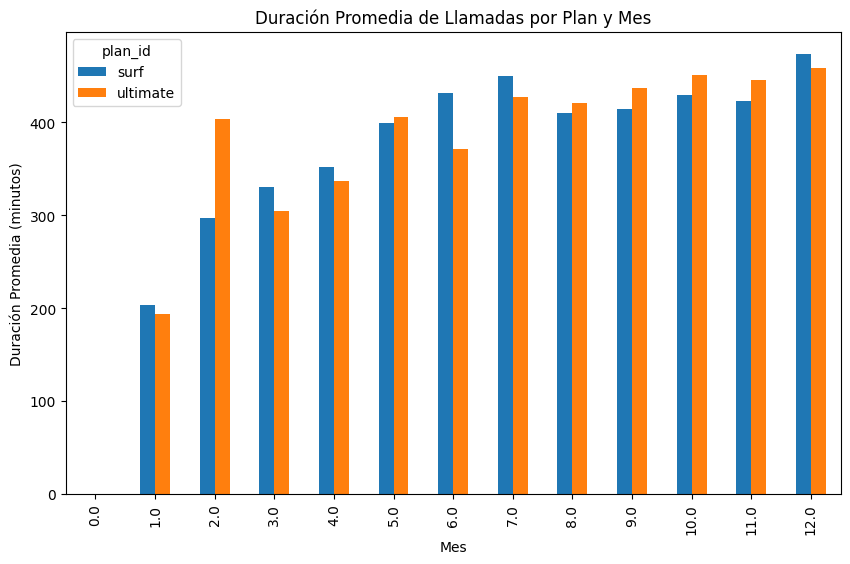

In [47]:
llamadas_promedio_por_mes.plot(kind='bar', figsize=(10, 6))
plt.title('Duración Promedia de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedia (minutos)')
plt.show()

In [48]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

numero_minutos_mensuales=tabla_de_consumo_planes.pivot_table(index=['user_id','plan_id'],values='minutos_usados',aggfunc='sum')
numero_minutos_mensuales = numero_minutos_mensuales.reset_index()
numero_minutos_mensuales

,user_id,plan_id,minutos_usados
0,1000,ultimate,124.0
1,1001,surf,1728.0
2,1002,surf,829.0
3,1003,surf,1104.0
4,1004,surf,2772.0
...,...,...,...
495,1495,surf,1765.0
496,1496,surf,1455.0
497,1497,ultimate,300.0
498,1498,surf,3211.0


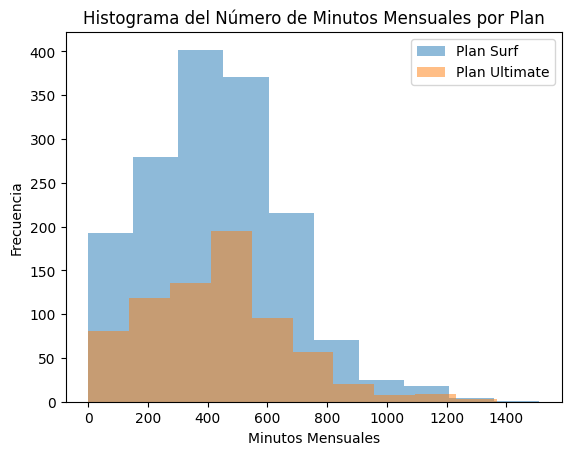

In [49]:
minutos_plan_surf = tabla_de_consumo_planes.query('plan_id=="surf"')['minutos_usados']
minutos_plan_ultimate = tabla_de_consumo_planes.query('plan_id=="ultimate"')['minutos_usados']

# Crear el histograma
plt.hist(minutos_plan_surf, alpha=0.5, label='Plan Surf', bins=10)
plt.hist(minutos_plan_ultimate, alpha=0.5, label='Plan Ultimate', bins=10)


plt.xlabel('Minutos Mensuales')
plt.ylabel('Frecuencia')
plt.title('Histograma del Número de Minutos Mensuales por Plan')
plt.legend()

plt.show()

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se determinó la mediana, moda y desviación estandar 
     
</div>

In [50]:
# Calcula la media y la varianza de la duración mensual de llamadas.

#Plan Surf:
media_llamadas_surf= tabla_de_consumo_planes.query('plan_id=="surf"')['minutos_usados'].mean()
variacion_llamadas_surf = tabla_de_consumo_planes.query('plan_id=="surf"')['minutos_usados'].var()
moda_llamadas_surf = tabla_de_consumo_planes.query('plan_id=="surf"')['minutos_usados'].mode()
mediana_llamadas_surf = tabla_de_consumo_planes.query('plan_id=="surf"')['minutos_usados'].median()
desviacion_estandar_llamadas_suf = tabla_de_consumo_planes.query('plan_id=="surf"')['minutos_usados'].std()
print(f'La media de duración  de las llamadas del plan surf es de: {media_llamadas_surf}')
print(f'La varianza de la duración de las llamadas del plan surf es de:{variacion_llamadas_surf}')
print(f'La moda de la duración de las llamadas del plan surf es de:{moda_llamadas_surf}')
print(f'La mediana de la duración de las llamadas del plan surf es de:{mediana_llamadas_surf}')
print(f'La desviacion estandar de la duración de las llamadas del plan surf es de:{desviacion_estandar_llamadas_suf}')


La media de duración  de las llamadas del plan surf es de: 427.12032932235593
La varianza de la duración de las llamadas del plan surf es de:55455.57740014497
La moda de la duración de las llamadas del plan surf es de:0    0.0
dtype: float64
La mediana de la duración de las llamadas del plan surf es de:424.0
La desviacion estandar de la duración de las llamadas del plan surf es de:235.49007919686335


In [51]:
#Plan Ultimate

media_llamadas_ultimate= tabla_de_consumo_planes.query('plan_id=="ultimate"')['minutos_usados'].mean()
variacion_llamadas_ultimate = tabla_de_consumo_planes.query('plan_id=="ultimate"')['minutos_usados'].var()
moda_llamadas_ultimate = tabla_de_consumo_planes.query('plan_id=="ultimate"')['minutos_usados'].mode()
mediana_llamadas_ultimate = tabla_de_consumo_planes.query('plan_id=="ultimate"')['minutos_usados'].median()
desviacion_estandar_llamadas_ultimate = tabla_de_consumo_planes.query('plan_id=="ultimate"')['minutos_usados'].std()

print(f'La media de duración de las llamadas del plan ultimate es de: {media_llamadas_ultimate}')
print(f'La varianza de la duración de las llamadas del plan ultimate es de:{variacion_llamadas_ultimate}')
print(f'La moda de la duración de las llamadas del plan ultimate es de:{moda_llamadas_ultimate}')
print(f'La mediana de la duración de las llamadas del plan ultimate es de:{mediana_llamadas_ultimate}')
print(f'La desviacion estandar de la duración de las llamadas del plan ultimate es de:{desviacion_estandar_llamadas_ultimate}')

La media de duración de las llamadas del plan ultimate es de: 428.0718232044199
La varianza de la duración de las llamadas del plan ultimate es de:58543.878651719744
La moda de la duración de las llamadas del plan ultimate es de:0    0.0
dtype: float64
La mediana de la duración de las llamadas del plan ultimate es de:421.5
La desviacion estandar de la duración de las llamadas del plan ultimate es de:241.9584233948464


<Figure size 1000x600 with 0 Axes>

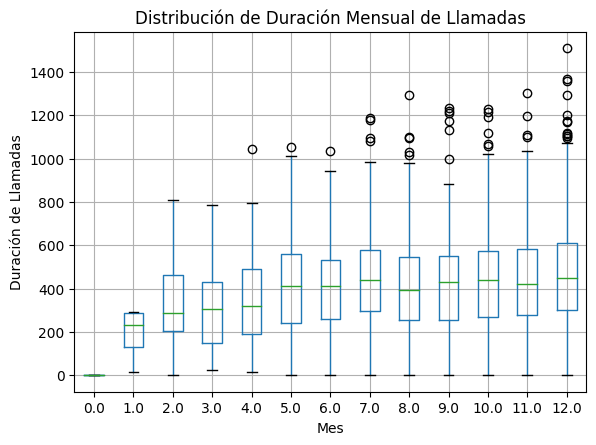

In [52]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(10, 6))
tabla_de_consumo_planes.boxplot(column='minutos_usados', by='mes')
plt.title('Distribución de Duración Mensual de Llamadas')
plt.xlabel('Mes')
plt.ylabel('Duración de Llamadas')
plt.suptitle("")
plt.show()


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Basándonos en el análisis realizado y en los datos proporcionados, los usuarios del plan surf tienen mayor nuemero 
de llamadas y mayor duracion de llamadas en comparacion a el plan ultimate, que a menudo exceden los limites de su 
plan.      
</div>


### Mensajes

In [53]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mensajes_totales_por_mes = tabla_de_consumo_planes.groupby(['mes', 'plan_id'])['cantidad_de_mensajes'].sum().unstack()
mensajes_totales_por_mes


plan_id,surf,ultimate
mes,,
0.0,0.0,0.0
1.0,21.0,62.0
2.0,108.0,151.0
3.0,351.0,243.0
4.0,870.0,463.0
5.0,1849.0,931.0
6.0,2454.0,1379.0
7.0,3271.0,1937.0
8.0,4662.0,2732.0


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se determinó información de la mediana , moda y desviación estandar de ambas planes.
      
</div>

In [54]:
mediana_mensajes_surf = tabla_de_consumo_planes.query('plan_id=="surf"')['cantidad_de_mensajes'].median()
moda_mensual_surf = tabla_de_consumo_planes.query('plan_id=="surf"')['cantidad_de_mensajes'].mode()
desviacion_estandar_mensajes_surf = tabla_de_consumo_planes.query('plan_id=="surf"')['cantidad_de_mensajes'].std()

print(f'La mediana de la cantidad de mensajes del plan surf es de:{mediana_mensajes_surf}')
print(f'La moda de la cantidad de mensajes del plan surf es de:{moda_mensual_surf}')
print(f'La desviacion estandar de la cantidad de mensajes del plan surf es de:{desviacion_estandar_mensajes_surf}')

La mediana de la cantidad de mensajes del plan surf es de:24.0
La moda de la cantidad de mensajes del plan surf es de:0    0.0
dtype: float64
La desviacion estandar de la cantidad de mensajes del plan surf es de:33.55768281940468


In [55]:
mediana_mensajes_ultimate = tabla_de_consumo_planes.query('plan_id=="ultimate"')['cantidad_de_mensajes'].median()
moda_mensajes_ultimate=tabla_de_consumo_planes.query('plan_id=="ultimate"')['cantidad_de_mensajes'].mode()
desviacion_estandar_mensajes_ultimate=tabla_de_consumo_planes.query('plan_id=="ultimate"')['cantidad_de_mensajes'].std()

print(f'La mediana de la cantidad de mensajes del plan ultimate es de:{mediana_mensajes_ultimate}')
print(f'La moda  de la cantidad de mensajes del plan ultimate es de:{moda_mensajes_ultimate}')
print(f'La desviacion estandar de la cantidad de mensajes del plan ultimate es de:{desviacion_estandar_mensajes_ultimate}')

La mediana de la cantidad de mensajes del plan ultimate es de:30.0
La moda  de la cantidad de mensajes del plan ultimate es de:0    0.0
dtype: float64
La desviacion estandar de la cantidad de mensajes del plan ultimate es de:34.78257626600977


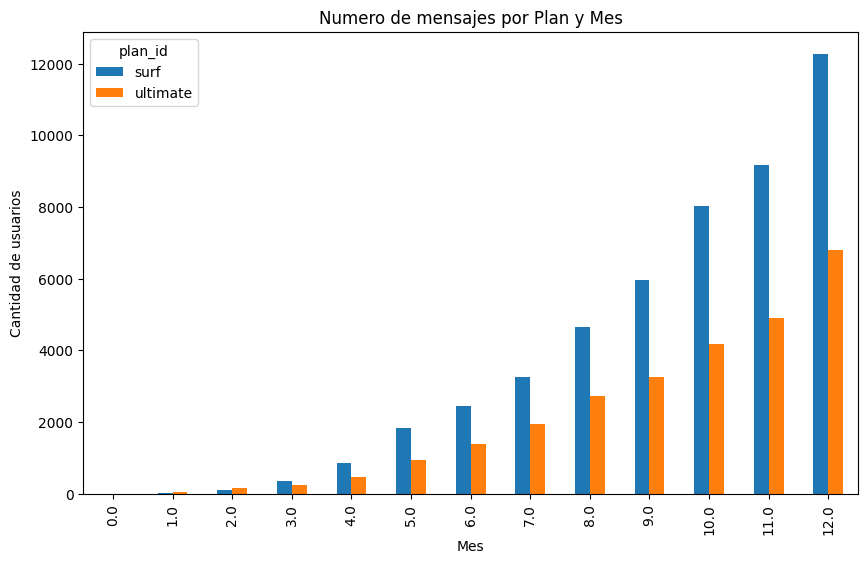

In [56]:
mensajes_totales_por_mes.plot(kind='bar', figsize=(10, 6))
plt.title('Numero de mensajes por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de usuarios')
plt.show()

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se realizó histograma.
      
</div>

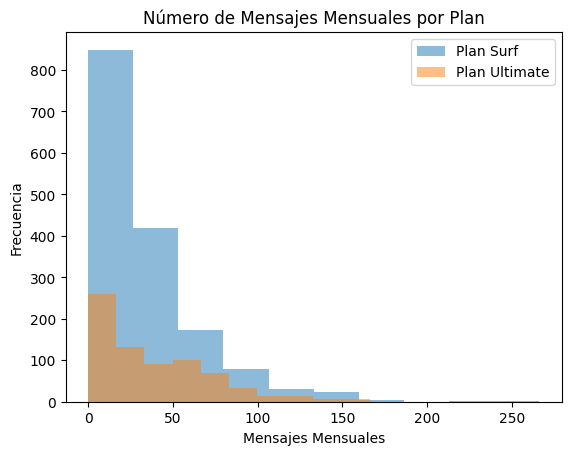

In [57]:
cantidad_mensajes_plan_surf = tabla_de_consumo_planes.query('plan_id=="surf"')['cantidad_de_mensajes']
cantidad_mensajes_plan_ultimate = tabla_de_consumo_planes.query('plan_id=="ultimate"')['cantidad_de_mensajes']

# Crear el histograma
plt.hist(cantidad_mensajes_plan_surf, alpha=0.5, label='Plan Surf', bins=10)
plt.hist(cantidad_mensajes_plan_ultimate, alpha=0.5, label='Plan Ultimate', bins=10)


plt.xlabel('Mensajes Mensuales')
plt.ylabel('Frecuencia')
plt.title('Número de Mensajes Mensuales por Plan')
plt.legend()

plt.show()

<Figure size 1000x600 with 0 Axes>

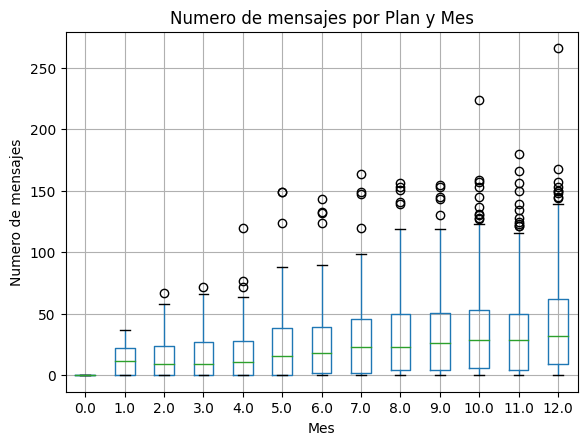

In [58]:
plt.figure(figsize=(10, 6))
tabla_de_consumo_planes.boxplot(column='cantidad_de_mensajes', by='mes')
plt.title('Numero de mensajes por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Numero de mensajes')
plt.suptitle("")
plt.show()

<div class="alert alert-block alert-info">
<b></b> <a class="tocSkip"></a>

Después de analizar el comportamiento de los usuarios con respecto a los mensajes, se observa que los usuarios del plan "ultimate" tienden a enviar y recibir más mensajes en promedio en comparación con los usuarios del plan "surf".
Esta diferencia puede ser indicativa de las preferencias y necesidades únicas de cada segmento de clientes. Los usuarios del plan "ultimate" podrían estar más orientados hacia el uso intensivo de servicios como la mensajería instantánea, correos electrónicos u otras formas de comunicación digital. Por otro lado, los usuarios del plan "surf" podrían utilizar menos activamente estos servicios o preferir métodos alternativos para la comunicación.

Estas conclusiones resaltan la importancia de comprender las diferencias en el comportamiento y las necesidades específicas de cada segmento para poder ofrecer servicios adaptados que satisfagan sus demandas únicas. Además, esta información es relevante para la toma decisiones estratégicas relacionadas con la gestión y optimización de recursos dentro de la red, así como para el desarrollo futuro de planes y servicios personalizados.

 
</div>


### Internet

In [59]:

datos_totales_por_plan = tabla_de_consumo_planes.groupby(['mes', 'plan_id'])['total_de_datos_usados_redondeados'].mean().unstack()
datos_totales_por_plan

plan_id,surf,ultimate
mes,,
0.0,0.000000,0.000000
1.0,5.000000,7.250000
2.0,12.222222,17.285714
3.0,13.565217,18.416667
4.0,12.220000,16.333333
5.0,14.116883,16.862069
6.0,15.484536,15.425532
7.0,16.876033,16.491525
8.0,16.882716,17.845070


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se determino la mediana, moda y desviación estandar
      
</div>

In [60]:
mediana_datos_surf = tabla_de_consumo_planes.query('plan_id=="surf"')['total_de_datos_usados_redondeados'].median()
moda_datos_surf = tabla_de_consumo_planes.query('plan_id=="surf"')['total_de_datos_usados_redondeados'].mode()
desviacion_estandar_datos_surf = tabla_de_consumo_planes.query('plan_id=="surf"')['total_de_datos_usados_redondeados'].std()

print(f'La mediana de la cantidad de ddatos del plan surf es de:{mediana_datos_surf}')
print(f'La moda de la cantidad de datos del plan surf es de:{moda_datos_surf}')
print(f'La desviacion estandar de la cantidad de datos del plan surf es de:{desviacion_estandar_datos_surf}')

La mediana de la cantidad de ddatos del plan surf es de:17.0
La moda de la cantidad de datos del plan surf es de:0    18.0
dtype: float64
La desviacion estandar de la cantidad de datos del plan surf es de:7.899501627984955


In [61]:
mediana_datos_ultimate = tabla_de_consumo_planes.query('plan_id=="ultimate"')['total_de_datos_usados_redondeados'].median()
moda_datos_ulltimate = tabla_de_consumo_planes.query('plan_id=="ultimate"')['total_de_datos_usados_redondeados'].mode()
desviacion_estandar_datos_ultimate = tabla_de_consumo_planes.query('plan_id=="ultimate"')['total_de_datos_usados_redondeados'].std()

print(f'La mediana de la cantidad de datos del plan ultimate es de:{mediana_datos_ultimate}')
print(f'La moda  de la cantidad de datos del plan ultimate es de:{moda_datos_ulltimate}')
print(f'La desviacion estandar de la cantidad de datos del plan ultimate es de:{desviacion_estandar_datos_ultimate}')

La mediana de la cantidad de datos del plan ultimate es de:17.0
La moda  de la cantidad de datos del plan ultimate es de:0    17.0
dtype: float64
La desviacion estandar de la cantidad de datos del plan ultimate es de:7.755840803278379


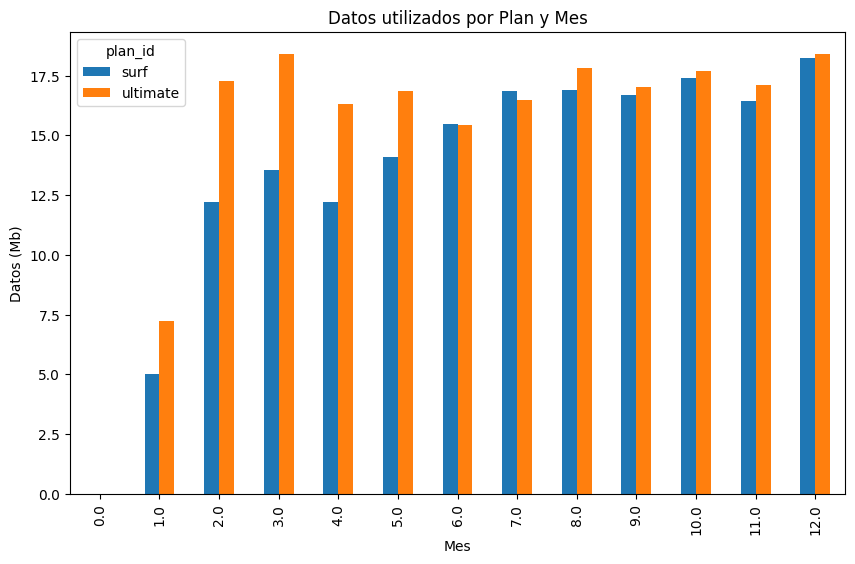

In [62]:
datos_totales_por_plan.plot(kind='bar', figsize=(10, 6))
plt.title('Datos utilizados por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Datos (Mb)')
plt.show()

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se realizo histograma
      
</div>

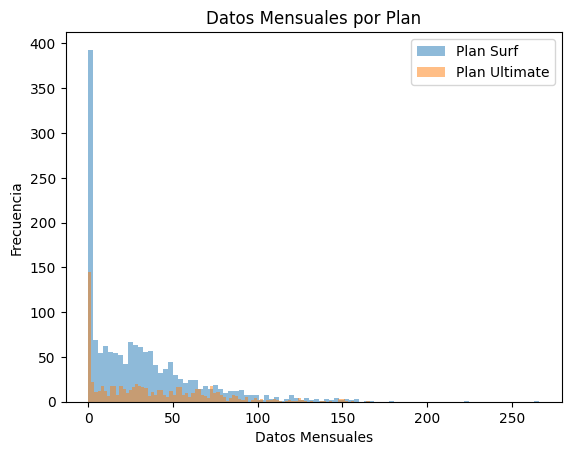

In [63]:
cantidad_datos_plan_surf = tabla_de_consumo_planes.query('plan_id=="surf"')['total_de_datos_usados_redondeados']
cantidad_datos_plan_ultimate = tabla_de_consumo_planes.query('plan_id=="ultimate"')['total_de_datos_usados_redondeados']

# Crear el histograma
plt.hist(cantidad_mensajes_plan_surf, alpha=0.5, label='Plan Surf', bins=90)
plt.hist(cantidad_mensajes_plan_ultimate, alpha=0.5, label='Plan Ultimate', bins=90)


plt.xlabel('Datos Mensuales')
plt.ylabel('Frecuencia')
plt.title('Datos Mensuales por Plan')
plt.legend()

plt.show()

<Figure size 1000x600 with 0 Axes>

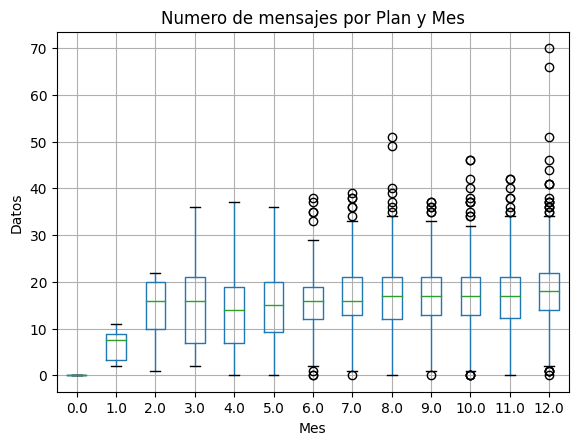

In [64]:
plt.figure(figsize=(10, 6))
tabla_de_consumo_planes.boxplot(column='total_de_datos_usados_redondeados', by='mes')
plt.title('Numero de mensajes por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Datos')
plt.suptitle("")
plt.show()

<div class="alert alert-block alert-info">
<b></b> <a class="tocSkip"></a>
    
Después de analizar el consumo de tráfico de Internet, se observa que los usuarios del plan "ultimate" tienden a consumir más tráfico en promedio en comparación con los usuarios del plan "surf". Los clientes del plan "ultimate" podrían estar utilizando más activamente servicios en línea que requieren un mayor ancho de banda, como la transmisión de video en alta definición o juegos en línea. Por otro lado, los usuarios del plan "surf" podrían estar optando por actividades menos intensivas en términos de uso de datos.
Estas diferencias en el comportamiento de consumo pueden tener implicaciones importantes para la gestión y optimización de la red, así como para el diseño y comercialización futura de planes y servicios. También sugiere que comprender las necesidades y preferencias específicas de cada segmento es crucial para satisfacer las demandas únicas tanto del mercado como del cliente.    
</div>


## Ingreso

In [78]:
# Agrupar los ingresos por plan
ingresos_por_mes_plan = tabla_de_consumo_planes.groupby('plan_id',)['ingreso_total'].agg(['mean','sum', 'sum','max','min'])

# Mostrar resultados
print(ingresos_por_mes_plan)


               mean       sum       sum     max   min
plan_id                                              
surf      60.551729  95611.18  95611.18  590.37  20.0
ultimate  72.301105  52346.00  52346.00  182.00  70.0


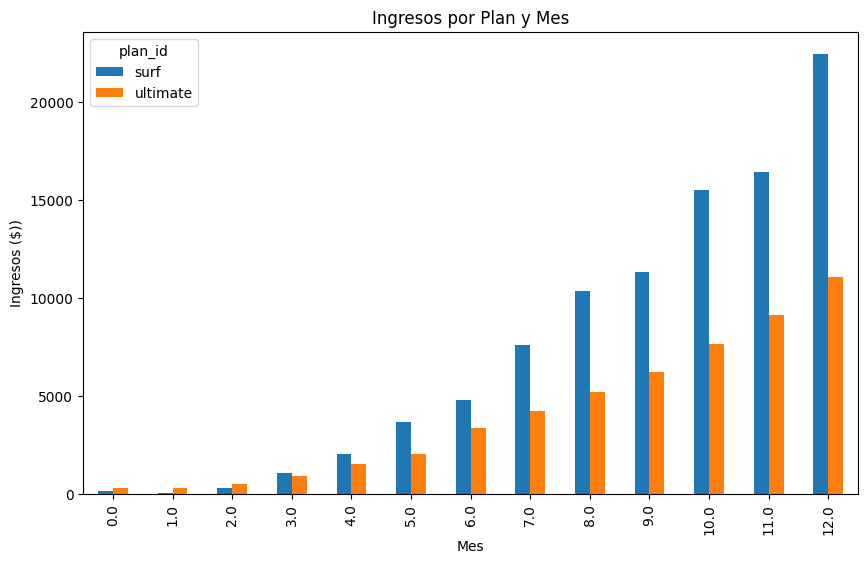

In [79]:
ingresos_por_plan = tabla_de_consumo_planes.groupby(['mes', 'plan_id'])['ingreso_total'].sum().unstack()

ingresos_por_plan.plot(kind='bar', figsize=(10, 6))
plt.title('Ingresos por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos ($))')
plt.show()

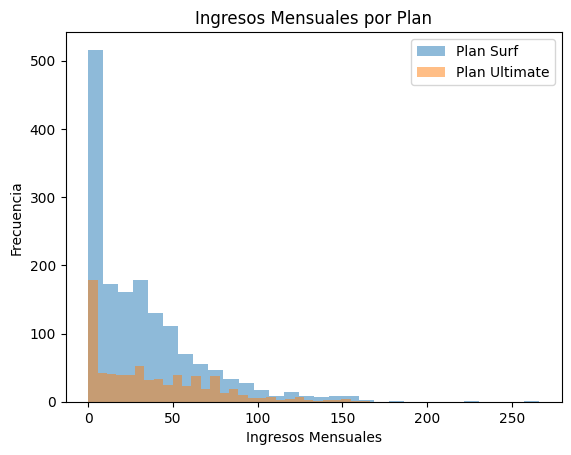

In [67]:
ingresos_plan_surf = tabla_de_consumo_planes.query('plan_id=="surf"')['ingreso_total']
ingresos_plan_ultimate = tabla_de_consumo_planes.query('plan_id=="ultimate"')['ingreso_total']

# Crear el histograma
plt.hist(cantidad_mensajes_plan_surf, alpha=0.5, label='Plan Surf', bins=30)
plt.hist(cantidad_mensajes_plan_ultimate, alpha=0.5, label='Plan Ultimate', bins=30)


plt.xlabel('Ingresos Mensuales')
plt.ylabel('Frecuencia')
plt.title('Ingresos Mensuales por Plan')
plt.legend()

plt.show()

<Figure size 1000x600 with 0 Axes>

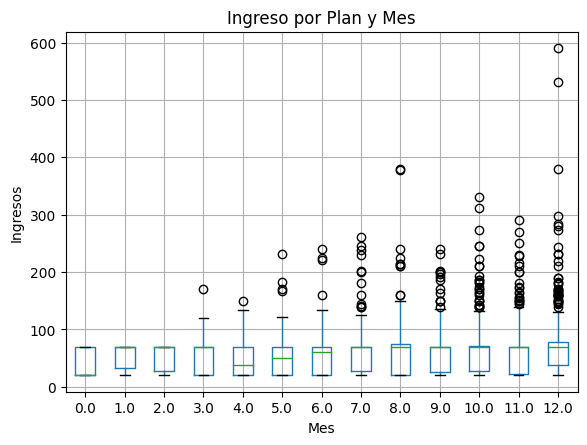

In [68]:
plt.figure(figsize=(10, 6))
tabla_de_consumo_planes.boxplot(column='ingreso_total', by='mes')
plt.title('Ingreso por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos')
plt.suptitle("")
plt.show()

<div class="alert alert-block alert-info">
<b></b> <a class="tocSkip"></a>
Se realizó los gráficos correspondientes barras , histograma y boxplot para un mejor analisis.    
Después del análisis, podemos concluir que hay una clara diferencia en los ingresos entre los planes "surf" y "ultimate". 
    Los clientes que utilizan el plan "surf" generan más ingresos , teniendo en cuenta que el promedio de usuarios con plan "Ultimate" tienen una tarifa de 70 usd ,esto sugiere que puede haber diferencias en el uso realizado por clientes suscritos a cada uno de estos planes, que podría estar relacionado a los excedentes de consumo realizados por los usuarios del plan ultimate, como lo muestran las gráficas a pesar de tener un plan base menor de 20 usd, se puede visualizar que se exceden en sus consumos.      
</div>


<div class="alert alert-block alert-info">
<b></b> <a class="tocSkip"></a>
Se realizó los graficos de lineplot y observar la evolución en el tiempo de cada plan.      
</div>


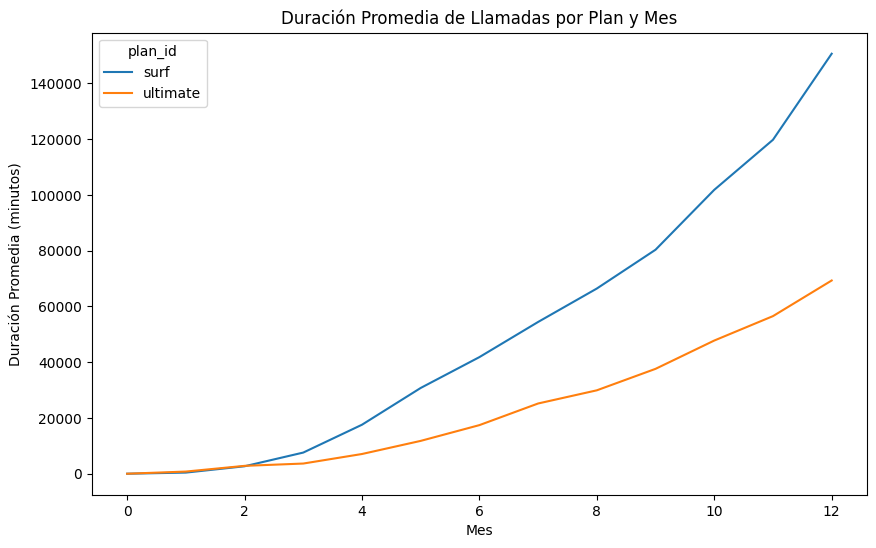

In [69]:
llamadas_promedio_por_mes = tabla_de_consumo_planes.groupby(['mes', 'plan_id'])['minutos_usados'].sum().unstack()
llamadas_promedio_por_mes.plot(kind='line', figsize=(10, 6))
plt.title('Duración Promedia de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedia (minutos)')
plt.show()

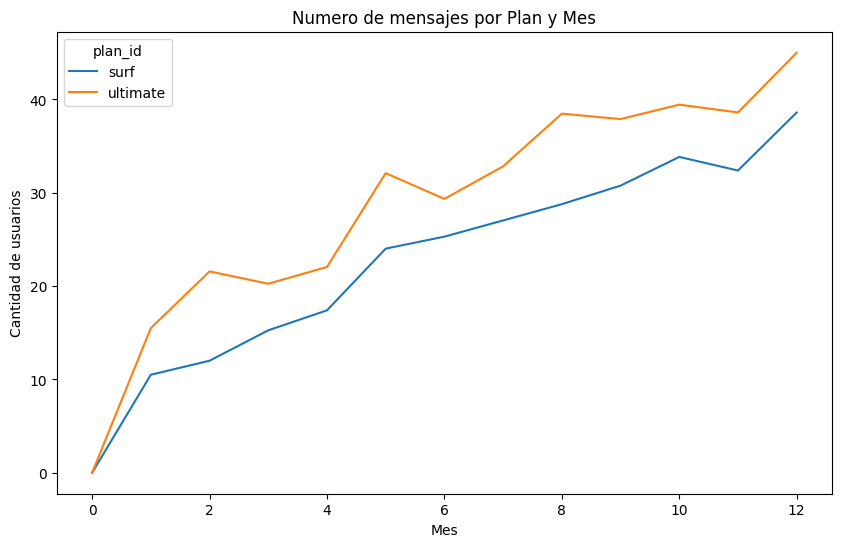

In [70]:
mensajes_totales_por_mes = tabla_de_consumo_planes.groupby(['mes', 'plan_id'])['cantidad_de_mensajes'].mean().unstack()
mensajes_totales_por_mes.plot(kind='line', figsize=(10, 6))
plt.title('Numero de mensajes por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de usuarios')
plt.show()

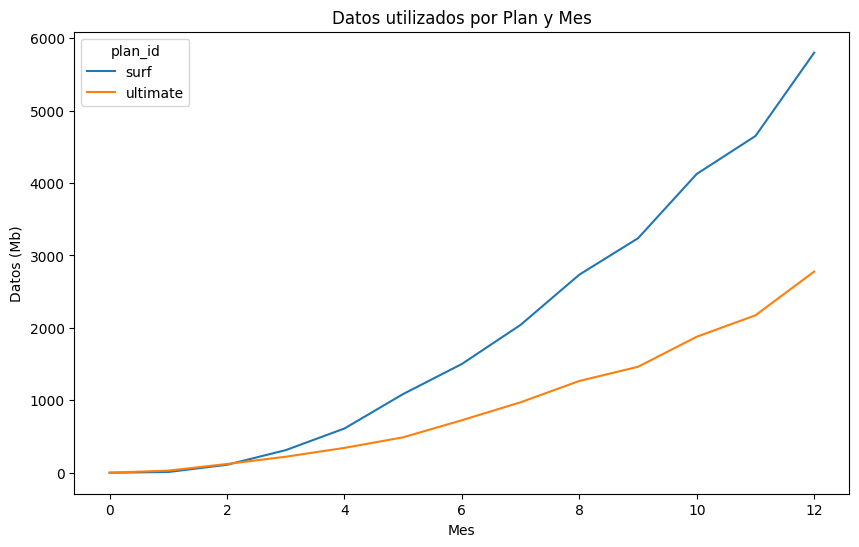

In [71]:
datos_totales_por_plan = tabla_de_consumo_planes.groupby(['mes', 'plan_id'])['total_de_datos_usados_redondeados'].sum().unstack()

datos_totales_por_plan.plot(kind='line', figsize=(10, 6))
plt.title('Datos utilizados por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Datos (Mb)')
plt.show()

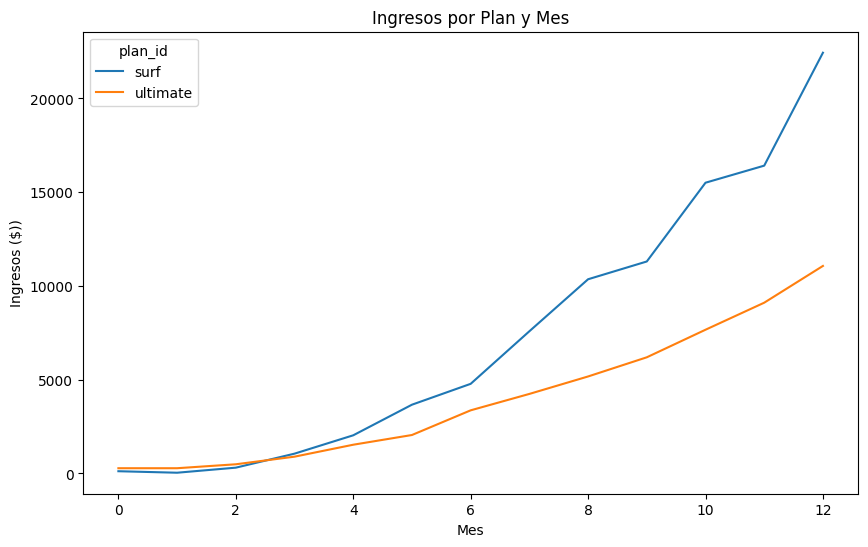

In [72]:
ingresos_por_plan = tabla_de_consumo_planes.groupby(['mes', 'plan_id'])['ingreso_total'].sum().unstack()

ingresos_por_plan.plot(kind='line', figsize=(10, 6))
plt.title('Ingresos por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos ($))')
plt.show()

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Observamos en las graficas lineplot que el plan surf tiene mayores ingresos en el tiempo.
      
</div>

## Prueba las hipótesis estadísticas

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hipotesis Nula : Los ingresos  de los usuarios de los planes Ultimate y Surf son iguales.

Hipotesis Alternativa: No hay diferencia significativa en los ingresos totales entre los usuarios del plan "surf" y los usuarios del plan "ultimate"     
</div>

In [82]:
# Prueba las hipótesis
# Los ingresos  de los usuarios de los planes Ultimate y Surf son iguales.
ingresos_surf = tabla_de_consumo_planes[tabla_de_consumo_planes['plan_id'] == 'surf']['ingreso_total']
ingresos_ultimate = tabla_de_consumo_planes[tabla_de_consumo_planes['plan_id'] == 'ultimate']['ingreso_total']
alpha=0.05

#resultados = ttest_ind(ingresos_surf, ingresos_ultimate, equal_var=False)
resultados_t_test = stats.ttest_ind(ingresos_surf, ingresos_ultimate, equal_var=False)

print(f'p-value:{resultados_t_test.pvalue}')
if resultados_t_test.pvalue < alpha:
    print("Podemos rechazar la hipótesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

p-value:1.218411585212325e-15
Podemos rechazar la hipótesis nula


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Hemos llevado a cabo un análisis estadístico para comparar los ingresos totales entre dos planes de consumo diferentes, "surf" y "ultimate". La finalidad de este análisis es determinar si no existe diferencia en los ingresos generados por los usuarios de estos dos planes.
Los resultados de nuestro análisis indican que los ingresos generados por los planes "surf" y "ultimate" no son iguales. Esta diferencia es estadísticamente significativa, lo que sugiere que la elección del plan influye en los ingresos totales obtenidos. 
      
</div>

In [84]:
# Hipotesis Alternativa :
#No hay diferencia significativa en los ingresos totales entre los usuarios del plan "surf" y los usuarios del plan "ultimate"

ingresos_surf = tabla_de_consumo_planes[tabla_de_consumo_planes['plan_id'] == 'surf']['ingreso_total']
ingresos_ultimate = tabla_de_consumo_planes[tabla_de_consumo_planes['plan_id'] == 'ultimate']['ingreso_total']


resultados_levene=stats.levene(ingresos_surf, ingresos_ultimate)
print(f'p-value:{resultados_levene.pvalue}')
if resultados_levene.pvalue < alpha:
    print("Podemos rechazar la hipótesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

p-value:3.070976609395645e-83
Podemos rechazar la hipótesis nula


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
La finalidad de este análisis es determinar si existe una diferencia significativa en los ingresos generados por los usuarios de estos dos planes.
Dado que el valor p  es menor que nuestro nivel de significancia α (0.05)
rechazamos la hipótesis nula. Esto significa que hay una diferencia significativa en los ingresos totales entre los usuarios del plan "surf" y los usuarios del plan "ultimate".
      
</div>

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

In [75]:
#Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones

# Paso 1: Extraer y agrupar los datos por región
ny_nj_users = user_df[user_df['city'].str.contains('NY|NJ')]
other_users = user_df[~user_df['city'].str.contains('NY|NJ')]

# Ingresos por región
ingresos_ny_nj = tabla_de_consumo_planes[tabla_de_consumo_planes['user_id'].isin(ny_nj_users['user_id'])]['ingreso_total']
ingresos_otros = tabla_de_consumo_planes[tabla_de_consumo_planes['user_id'].isin(other_users['user_id'])]['ingreso_total']

# Paso 3: Prueba t de Student para dos muestras independientes
t_stat, p_value = stats.ttest_ind(ingresos_ny_nj, ingresos_otros, equal_var=False)

print(f"t-statistic={t_stat}, p-value={p_value}")




t-statistic=-1.5511915604321744, p-value=0.12126002617160894


In [76]:
# Prueba las hipótesis
# Interpretación de resultados
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. El ingreso promedio de los usuarios del área NY-NJ es significativamente diferente al de los usuarios de otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.")



No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hemos llevado a cabo un análisis estadístico para comparar los ingresos de los usarios del área NY-NJ es diferente a la 
de otras regiones.
Dado que el valor p  es mayor que nuestro nivel de significancia α (0.05)
No rechazamos la hipótesis nula. Esto significa que hay una diferencia  en los ingresos totales entre los usuarios de la zona NY-NJ son diferentes a la de otras regiones.
      
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Del analisis efectuado en relacion con los ingresos promedios por cada plan , se encontró una diferencia significativa, dado que se percibe mucho más ingresos en el plan surf , esto debido a el exceso de consumo que hacen los usuarios de este plan en comparación con el plan ultimate.
Existe una clara varaiación en cuanto a los niveles promedio de ingreso generados por cada tipo de plan, lo puede indicar diferencias importantes en términos del valor percibido o del uso realizado por clientes suscritos a cada uno de estos planes. Estas conclusiones podrían ser útiles para tomar decisiones estratégicas relacionadas con la fijación de precios, segmentación del mercado o diseño de nuevos servicios para mejorar la rentabilidad y satisfacción del cliente.       
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

De acuerdo a la muestra de 500 cientes de la Empresa Megaline, se tiene la información de los usuarios, ciudad,
cantidad de llamadas, mensajes y datos usados asi como también las tarifas por los 2 planes que tiene Surf y Ultimate.
Por lo que para su mejor ánalisis es necesario la importación de la información y las librerias necesarias para 
python.
Se revisaron los datos para identificar valores nulos, duplicados o atípicos.
En la información de los Dataframe no se encontraron muchos valores ausentes por lo que se opto 
por reemplazarlos con 0.
Se realizaron conversiones de tipos de datos necesario en las fechas.
Al tener la información en distintos Dataframe , se opto por unir la información necesaria de las columnas relevantes
para el ánalisis ('planes_id','mes') valores en común para tener la información en específico en una Dataframe
que nos muestre la información por usuario , el plan que le corresponde así como tambíen el uso de datos, mens
Se crearon nuevas columnas a partir de los datos existentes para proporcionar información adicional relevante para el análisis,
que contienen la información de la cantidad de servicios adicionales que consumieron los usuarios , par poder determinar los 
ingresos en total incluyendo el costo base de la tarifa y los costos excedentes.
En el estudio de comportamiento se decidió hallar estadísticas descriptivas para resumir características clave 
del conjunto de datos (media,mediana,moda,desviación estandar) asi como también se realizaron las visualizacion con el uso 
de gráficos (barras,histogramas,boxplot y lineplot) , que nos permiten visualizar el comportamiento y la evolución 
del consumo de los usuarios y determinar que plan genera un mayor ingreso para la empresa , que como se puede visualizar 
en el analisis corresponde al plan Surf , que está relacionada a los excedentes de servicios que utilizan los usuarios de 
este plan.
Por último establecimos Hipotesis Nula (Los ingresos son iguales en ambos planes) y de acuerdo al ánalisis hecho es 
y los cálculos determinamos que debemos de rechazar la Hipótesis Nula.
Por lo que se concluye por el ánalisis hecho el plan que genera mayores ingresos es el plan de Surf.
</div>
